In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import sigkernel as ksig

In [2]:
num_permutations = 200
n_levels = 5
n_samples = 100
sample_len = 60
dt = 1 / 252

static_kernel = ksig.static.kernels.LinearKernel()
sig_kernel = ksig.kernels.SignatureKernel(n_levels, static_kernel=static_kernel)
kernel = lambda X,Y : sig_kernel(X, Y)
mmd = lambda X,Y : ksig.tests.quadratic_time_mmd(X, Y, kernel)

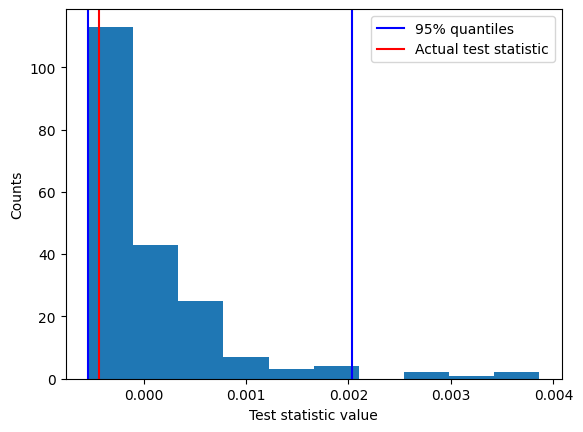

In [3]:
X = ksig.tests.gen_GBM_path(mu=0.1, sigma=0.2, dt=dt, n_paths=n_samples, seq_len=sample_len)
Y = ksig.tests.gen_GBM_path(0.1, 0.4, dt, n_samples, sample_len)

stats_dist = ksig.tests.two_sample_permutation_test(mmd, X, Y, num_permutations)
stats = mmd(X,Y)
ksig.tests.plot_permutation_samples(stats_dist, stats)

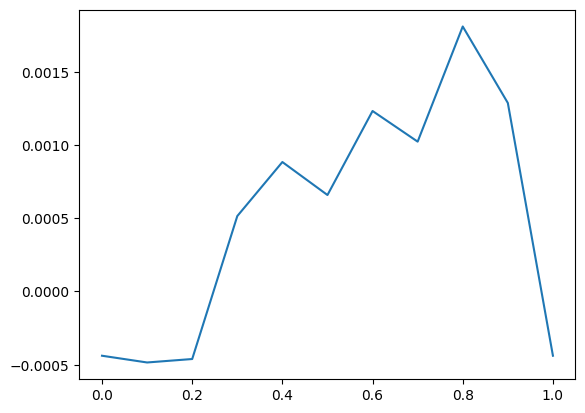

In [4]:
distribution = np.empty((2, 11))
for i in range(11):
    split = i / 10
    index = int(split * n_samples)

    X_ = np.concatenate([X[:index], Y[index:]])
    Y_ = np.concatenate([Y[:index], X[index:]])

    stats = mmd(X_, Y_)
    distribution[0, i] = split
    distribution[1, i] = stats
plt.plot(distribution[0], distribution[1])

In [5]:
mmd(X, Y)

-0.00043878376959471943